In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv


# Loading Dataset file

In [2]:
data = pd.read_csv("/kaggle/input/smart-agricultural-production-optimizing-engine/Crop_recommendation.csv")

# Finding the Shape of Dataset

In [3]:
data.shape

(2200, 8)

# Inspecting the first 10 rows of the Dataset

In [4]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


# Checking the Null values if any?

In [5]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Checking the Values

In [6]:
data["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

# Finding the Average of different Variables

In [7]:
for col in data.columns:
    if col == 'label': continue
    print("Average", col, "required: {:.2f}".format(data[col].mean()))

Average N required: 50.55
Average P required: 53.36
Average K required: 48.15
Average temperature required: 25.62
Average humidity required: 71.48
Average ph required: 6.47
Average rainfall required: 103.46


# Summary statitistics of each crop

In [8]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    for col in data.columns:
        if col == 'label':
            continue
        cur = ""
        if col == 'N': 
            cur = "Nitrogen"
        elif col == 'P':
            cur = 'Phosphorus'
        elif col == 'K':
            cur = 'Potassium'
        else:
            cur = col
        print("---------------------------------------------")
        print("Statistics for", cur)
        print("Minimum", cur, "required: {:.2f}".format(x[str(col)].min()))
        print("Average", cur, "required: {:.2f}".format(x[str(col)].mean()))
        print("Maximum", cur, "required: {:.2f}".format(x[str(col)].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# Comparison of the average requirement for each crop with average conditions


In [9]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    for label in data.label.unique():
        print(label, ": {0:.2f}".format(data[(data['label'] == label)][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

#  Making this function more Intuitive

In [10]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("-------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

# Distributions for Agricultural Conditions

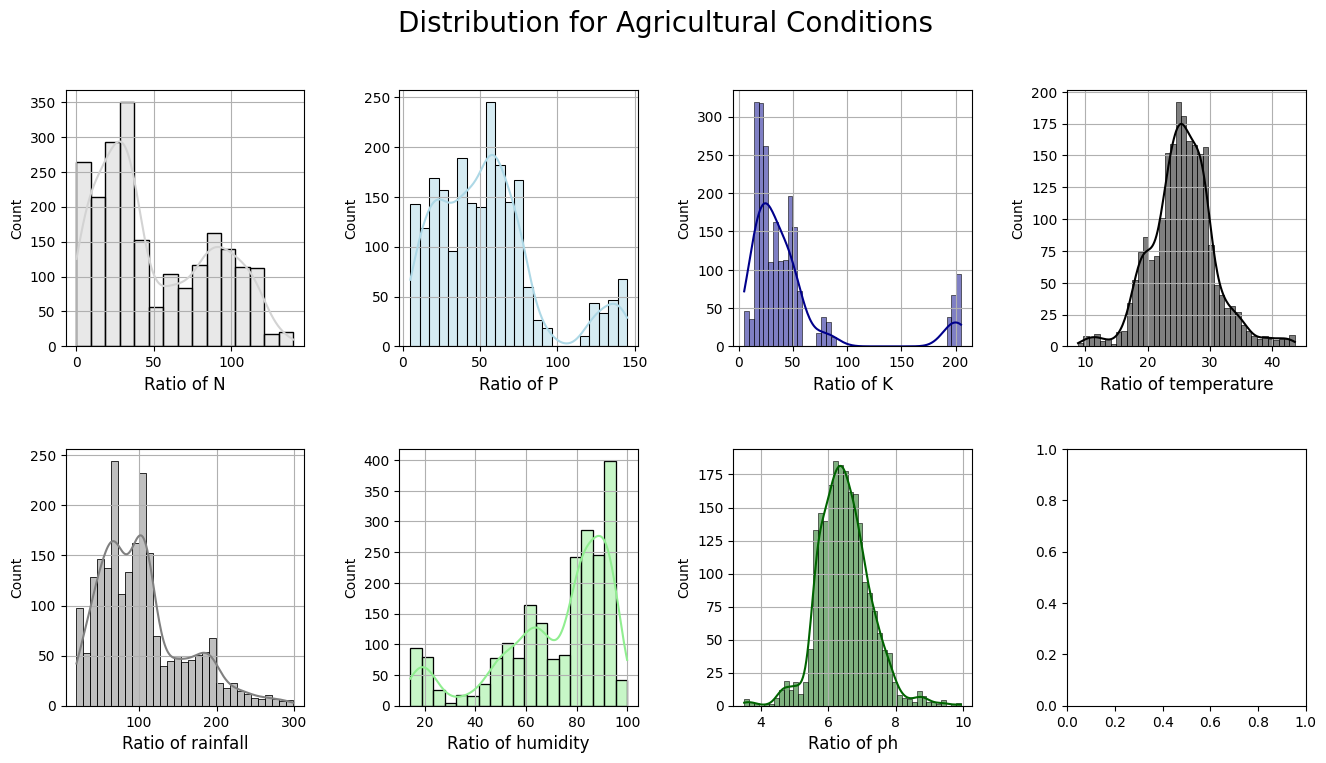

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Define the data columns and colors
columns = ['N', 'P', 'K', 'temperature', 'rainfall', 'humidity', 'ph']
colors = ['lightgrey', 'lightblue', 'darkblue', 'black', 'grey', 'lightgreen', 'darkgreen']

# Loop through the subplots and create the distribution plots
for i, col in enumerate(columns):
    row = i // 4
    col_num = i % 4
    
    sns.histplot(data[col], color=colors[i], ax=axes[row, col_num], kde=True)
    axes[row, col_num].set_xlabel(f'Ratio of {col}', fontsize=12)
    axes[row, col_num].grid()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Add a title for the entire figure
plt.suptitle('Distribution for Agricultural Conditions', fontsize=20)

# Show the plot
plt.show()

# Finding out Some Interesting Facts.

In [12]:
print("Crops which requires very High Ratio of Nirtogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature:", data[data['temperature'] > 10]['label'].unique())
print("Crops which requires very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidty:", data[data['humidity'] > 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Cr0ps which requires very Low pH:", data[data['ph'] > 9]['label'].unique())

Crops which requires very High Ratio of Nirtogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Humidty: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon'
 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
Crops which requires very Low pH: ['mothbeans']
Cr0ps which requires very Low pH: ['mothbe

# Seasonal crops recommendations (Summer, Winter, Rainy)

In [13]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


# Removing of columns to find some more Insights.

In [14]:
from sklearn.cluster import KMeans

# removing the labels column
x = data.drop(['label'], axis=1)

# selecting all the values of the data
x = x.values

# checking the shape
print(x.shape)

(2200, 7)


#  To determine the Optimum Number of Clusters within the Dataset

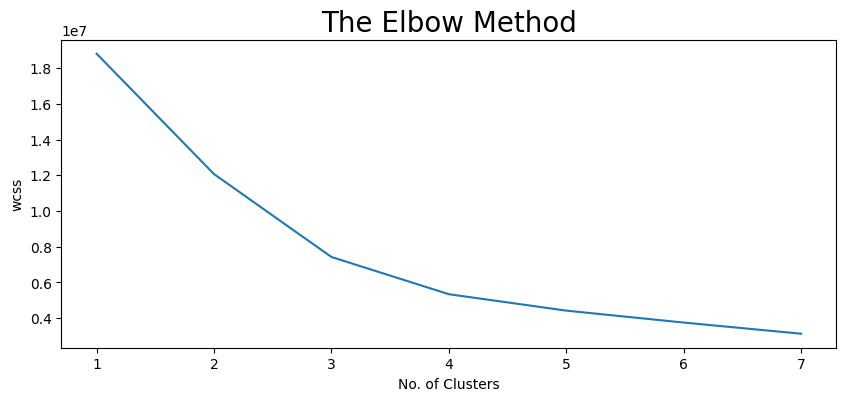

In [15]:
# Lets determine the Optimum Number of Clusters within the Dataset

plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 8):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
# Lets plot the results
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# Implementation of K Means to perform Clustering Analysis.

In [16]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 42)
y_means = km.fit_predict(x)
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# Clusters of each crop
print("Crops in First cluster:", z[z['cluster'] == 0][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Second cluster:", z[z['cluster'] == 1][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Third cluster:", z[z['cluster'] == 2][ 'label'].unique())
print("----------------------------------------------------------------")
print("Crops in Forth cluster:", z[z['cluster'] == 3][ 'label'].unique())

Crops in First cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------
Crops in Second cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
----------------------------------------------------------------
Crops in Third cluster: ['grapes' 'apple']
----------------------------------------------------------------
Crops in Forth cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


# Splitting up of the Dataset for Predictive Modelling

In [17]:
# Lets split the Dataset for Predictive Modelling
y = data['label']
x = data.drop(['label'], axis = 1)

x.shape, y.shape

((2200, 7), (2200,))

# Creations of the Training and Testing Sets for Validation of Results

In [18]:
# Lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train.shape, x_test.shape, y_train.shape, x_test.shape

((1760, 7), (440, 7), (1760,), (440, 7))

# Creation of a Predictive Model

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 # Evaluation of the Model Performance

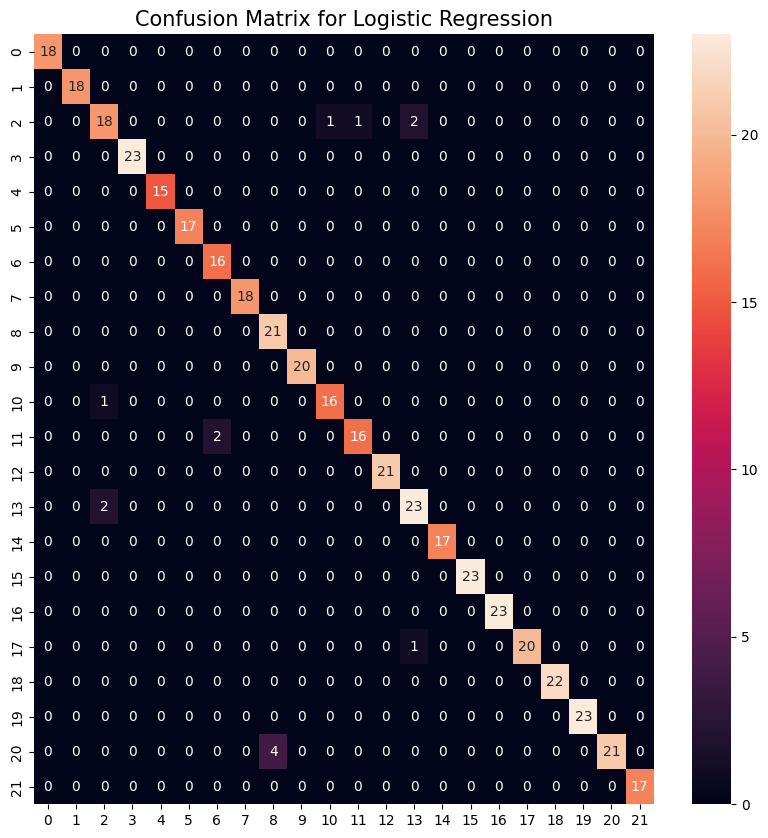

In [20]:
# Lets evaluate the Model Performance
from sklearn.metrics import confusion_matrix

# Lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,)
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

# Printing out the Classification Report.

In [21]:
# Lets print the Classification Repost also
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

# Inspecting the Head of the Dataset to choose similar sample

In [22]:
# Lets check the Head of the Dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Pridiction

In [23]:
x = [62,50,41,21,84,8,239]
prediction = model.predict((np.array([x])))
print("The suggested crop for given climatic condition is :", prediction)

The suggested crop for given climatic condition is : ['rice']


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Saving model for deployment

In [24]:
import pickle
# save the model to disk
filename = 'best_model.pickle'
pickle.dump(model, open(filename, 'wb'))